In [78]:
# prepares the notebook for "inline" graphing, and imports matplotlib library
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [79]:
basePath = r'C:\Users\Ted Mburu\NbO2'
# fileName = r'IVs_NbO2_Ti0_Sam3_071322_2.txt' # 15x15
fileName = r'IVNb0p100Ti0p00O2_02-04262022-11.txt' # 2x2

def find_between(s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

# NbPercentage = str(int(find_between(fileName, "IVNb", "Ti").split('p')[1]) / 100)
# TiPercentage = str(int(find_between(fileName, "Ti", "O2").split('p')[1]) / 100)
# sampleNumber = find_between(fileName, "_", "-")
# deviceNumber = find_between(fileName, "-", ".txt").split('-')[1]

filePath = basePath + r'\Doping0\ '.rstrip() + fileName
# if (NbPercentage  == "0.95"):
#     filePath = basePath + r'\Doping05\ '.rstrip() + fileName
# elif (NbPercentage  == "0.90"):
#     filePath = basePath + r'\Doping10\ '.rstrip() + fileName
# else: 
#     filePath = basePath + r'\Doping0\ '.rstrip() + fileName
    
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data=df5.values
df5.head()

t= data[:,0]
I= data[:,1]
V= data[:,2]

print(filePath)

C:\Users\Ted Mburu\NbO2\Doping0\IVNb0p100Ti0p00O2_02-04262022-11.txt


All Data


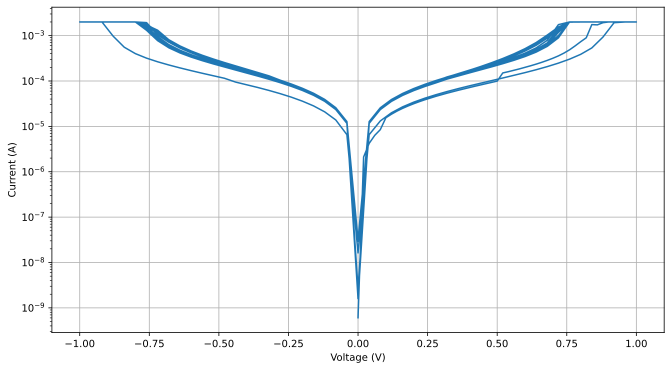

In [80]:
# C:\Users\Ted Mburu\NbO2\Doping0
plt.rcParams['figure.figsize'] = (11,6)
plt.figure(0)
plt.grid()
plt.semilogy(V,I)

plt.xlabel('Voltage (V)');
plt.ylabel('Current (A)');

# nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
# ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
# sampleText = '  Sample ' + sampleNumber
# device = '  Device ' + deviceNumber

# title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sampleText + device
# plt.title(title);
print("All Data")

In [81]:
largestCurrent = np.amax(I)
maxCurrentThreshhold = largestCurrent * 0.80;
indexOfFirstLargeCurrent = np.argmax(I > maxCurrentThreshhold)

t= t[indexOfFirstLargeCurrent:]
I= I[indexOfFirstLargeCurrent:]
V= V[indexOfFirstLargeCurrent:]

secondDerivativeCurrent = np.gradient(np.gradient(I))

# manually calc slopes 

In [82]:
allZeroIndexes = []
zeroIndexes = []

allMaxIndexes = []
maxIndexes = []

posThreshValues = []
negThreshValues = []
posHoldValues = []
negHoldValues = []

In [83]:
def isIncreasing(L):
    return L[0] < L[len(L) - 1]

def isDecreasing(L):
    return L[0] > L[len(L) - 1]

def non_increasing(L):
    return all(x>=y for x, y in zip(L, L[1:]))

def non_decreasing(L):
    return all(x<=y for x, y in zip(L, L[1:]))

def monotonic(L):
    return non_increasing(L) or non_decreasing(L)

# 0 to + is thresh
# + to 0 is hold
# 0 to - thresh on neg
# - to 0 hold on neg

# this will sort runs into the piles and make all the currents positive

def sortIntoSide(time, voltage, current, secondDerivative):
    if isIncreasing(voltage) and isIncreasing(current):
        current = [ abs(x) for x in current]
        posThreshValues.append([time, voltage, current, secondDerivative])
    elif isDecreasing(voltage) and isDecreasing(current):
        current = [ abs(x) for x in current]
        posHoldValues.append([time, voltage, current, secondDerivative])
    elif isDecreasing(voltage) and isIncreasing(current):
        current = [ abs(x) for x in current]
        negThreshValues.append([time, voltage, current, secondDerivative])
    elif isIncreasing(voltage) and isDecreasing(current):
        current = [ abs(x) for x in current]
        negHoldValues.append([time, voltage, current, secondDerivative])
    else: 
        print("???")

In [84]:
# indexes of values that are pretty much 0
zeroThreshhold = 1e-5
for index, x in enumerate(I):
    if x < zeroThreshhold:
        allZeroIndexes.append(index)

# find the zero values that begin or end a run
zeroIndexes.append(allZeroIndexes[0])
for x in range(len(allZeroIndexes) - 1):
    if allZeroIndexes[x]+1 != allZeroIndexes[x+1]:
        zeroIndexes.append(allZeroIndexes[x])
        zeroIndexes.append(allZeroIndexes[x+1])

In [85]:
# find all the values that hit the max
for index, x in enumerate(I):
    if x > maxCurrentThreshhold:
        allMaxIndexes.append(index)
        
print(allMaxIndexes[:50])

# find the max values that start or end a run
for x in range(len(allMaxIndexes) - 1):
    if allMaxIndexes[x]+1 != allMaxIndexes[x+1]:
        maxIndexes.append(allMaxIndexes[x])
        maxIndexes.append(allMaxIndexes[x+1])

newMaxIndexes = []

for x in range(len(allMaxIndexes) - 1):
    if allMaxIndexes[x]+1 != allMaxIndexes[x+1]:
        newMaxIndexes.append(allMaxIndexes[x]+1)
        newMaxIndexes.append(allMaxIndexes[x+1]+1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 56, 57, 58, 59, 60, 61, 62, 63, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 202, 203, 204, 205, 206]


In [86]:
# combine all zero and max indexes into one sorted array
allIndexes = [*zeroIndexes, *maxIndexes]
allIndexes = sorted(allIndexes)

for x in range(3, len(allIndexes) - 1, 4):
    allIndexes[x] = allIndexes[x] + 1
    
goodRuns = []
for x in range(0, len(allIndexes) - 4, 4):
    if monotonic( V[allIndexes[x]:allIndexes[x+3]] ):
        goodRuns.append(allIndexes[x])
        goodRuns.append(allIndexes[x+1])
        goodRuns.append(allIndexes[x+2])
        goodRuns.append(allIndexes[x+3])
    
allIndexes = np.copy(goodRuns)
# print("all", allIndexes[:50])
# print()
# print("max", maxIndexes[:50])
# print()
# print("new", newMaxIndexes[:50])


In [87]:
# loop through each run and put the V and I values into an array
# then make an array with all the arrays
# the indexes in the original current array is also passed
timesToLoop = len(zeroIndexes) - 1
print(timesToLoop)
timesToLoop = 40
for x in range(20, timesToLoop, 2):
    voltageRun = []
    currentRun = []
    timeRun = []
    secondDerivativeRun = []
    start = allIndexes[x]
    stop = allIndexes[x+1]
    for y in range(start, stop):
        voltageRun.append(V[y])
        currentRun.append(I[y])
        timeRun.append(t[y])
        secondDerivativeRun.append(I[y])

    sortIntoSide(timeRun, voltageRun, currentRun, np.gradient(np.gradient(currentRun)))

200


In [88]:
# take second derivative of each current array

posThreshValuesGradients = []
negThreshValuesGradients = []
posHoldValuesGradients = []
negHoldValuesGradients = []

for x in posThreshValues:
    posThreshValuesGradients.append(x[3])
for x in negThreshValues:
    negThreshValuesGradients.append(x[3])
for x in posHoldValues:
    posHoldValuesGradients.append(x[3])
for x in negHoldValues:
    negHoldValuesGradients.append(x[3])
    
# find the index of the largest value in the 2nd derivative
posThreshValuesLargestGradient = []
negThreshValuesLargestGradient = []
posHoldValuesLargestGradient = []
negHoldValuesLargestGradient = []

# 0 to + is thresh
# + to 0 is hold
# 0 to - thresh on neg
# - to 0 hold on neg

# for x in posThreshValuesGradients:
#     largestValue = np.argmax(np.absolute(x[1:len(x) - 1])) - 1
#     posThreshValuesLargestGradient.append(largestValue)
# for x in negThreshValuesGradients:
#     largestValue = np.argmax(np.absolute(x[1:len(x) - 1])) - 1
#     negThreshValuesLargestGradient.append(largestValue)
# for x in posHoldValuesGradients:
#     largestValue = np.argmax(np.absolute(x[1:len(x) - 1])) + 1
#     posHoldValuesLargestGradient.append(largestValue)
# for x in negHoldValuesGradients:
#     largestValue = np.argmax(np.absolute(x[1:len(x) - 1])) + 1
#     negHoldValuesLargestGradient.append(largestValue)
    
for x in posThreshValuesGradients:
    largestValue = np.argmax(np.absolute(x[1:len(x) - 1])) + 1
    posThreshValuesLargestGradient.append(largestValue)
for x in negThreshValuesGradients:
    largestValue = np.argmax(np.absolute(x[1:len(x) - 1])) + 1
    negThreshValuesLargestGradient.append(largestValue)
for x in posHoldValuesGradients:
    largestValue = np.argmax(np.absolute(x[1:len(x) - 1])) + 1
    posHoldValuesLargestGradient.append(largestValue)
for x in negHoldValuesGradients:
    largestValue = np.argmax(np.absolute(x[1:len(x) - 1])) + 1
    negHoldValuesLargestGradient.append(largestValue)

In [89]:
# get the voltage when the largest second derivative happens
posThreshValuesVoltage = []
negThreshValuesVoltage = []
posHoldValuesVoltage = []
negHoldValuesVoltage = []

for x in range(len(posThreshValuesGradients)):
    voltage = posThreshValues[x][1][posThreshValuesLargestGradient[x]]
    posThreshValuesVoltage.append(voltage)
for x in range(len(negThreshValuesGradients)):
    voltage = negThreshValues[x][1][negThreshValuesLargestGradient[x]]
    negThreshValuesVoltage.append(voltage)
for x in range(len(posHoldValuesGradients)):
    voltage = posHoldValues[x][1][posHoldValuesLargestGradient[x]]
    posHoldValuesVoltage.append(voltage)
for x in range(len(negHoldValuesGradients)):
    voltage = negHoldValues[x][1][negHoldValuesLargestGradient[x]]
    negHoldValuesVoltage.append(voltage)

print(posThreshValuesVoltage)
print(negThreshValuesVoltage)
print(posHoldValuesVoltage)
print(negHoldValuesVoltage)

[0.68, 0.68, 0.68]
[-0.68, -0.72]
[0.68, 0.68]
[-0.72, -0.72, -0.68]


In [90]:
posThreshValuesCurrent = []
negThreshValuesCurrent = []
posHoldValuesCurrent = []
negHoldValuesCurrent = []

for x in range(len(posThreshValuesGradients)):
    current = posThreshValues[x][2][posThreshValuesLargestGradient[x]]
    posThreshValuesCurrent.append(current)
for x in range(len(negThreshValuesGradients)):
    current = negThreshValues[x][2][negThreshValuesLargestGradient[x]]
    negThreshValuesCurrent.append(current)
for x in range(len(posHoldValuesGradients)):
    current = posHoldValues[x][2][posHoldValuesLargestGradient[x]]
    posHoldValuesCurrent.append(current)
for x in range(len(negHoldValuesGradients)):
    current = negHoldValues[x][2][negHoldValuesLargestGradient[x]]
    negHoldValuesCurrent.append(current)

In [91]:
def average(array):
    return sum(array) / len(array)

print("Positive Threshold Voltage: ", average(posThreshValuesVoltage), "Standard Deviation: ", np.std(posThreshValuesVoltage))
print("Negative Threshold Voltage: ", average(negThreshValuesVoltage), "Standard Deviation: ", np.std(negThreshValuesVoltage))
print("Positive Hold Voltage: ", average(posHoldValuesVoltage), "Standard Deviation: ", np.std(posHoldValuesVoltage))
print("Negative Hold Voltage: ", average(negHoldValuesVoltage), "Standard Deviation: ", np.std(negHoldValuesVoltage))

Positive Threshold Voltage:  0.68 Standard Deviation:  0.0
Negative Threshold Voltage:  -0.7 Standard Deviation:  0.019999999999999962
Positive Hold Voltage:  0.68 Standard Deviation:  0.0
Negative Hold Voltage:  -0.7066666666666667 Standard Deviation:  0.018856180831641232


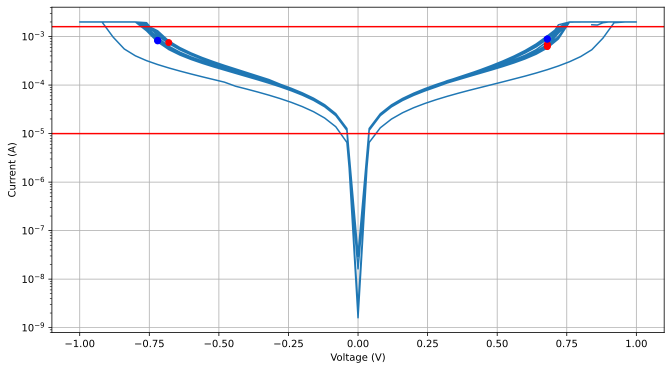

In [92]:
    plt.rcParams['figure.figsize'] = (11,6)
    plt.figure(0)
    plt.grid()
    plt.semilogy(V, I)
    plt.xlabel('Voltage (V)');
    plt.ylabel('Current (A)');
    # nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
    # ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
    # sampleText = '  Sample ' + sampleNumber
    # device = '  Device ' + deviceNumber

    # title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sampleText + device
    
    plt.axhline(y=maxCurrentThreshhold, color='r', linestyle='-')
    plt.axhline(y=zeroThreshhold, color='r', linestyle='-')

#     voltage = average(posThreshValuesVoltage)
#     current = average(posThreshValuesCurrent)
#     plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="ro")

#     voltage = average(negThreshValuesVoltage)
#     current = average(negThreshValuesCurrent)
#     plt.errorbar(voltage, current, xerr=np.std(negThreshValuesVoltage), fmt="bo")

#     voltage = average(posHoldValuesVoltage)
#     current = average(posHoldValuesCurrent)
#     plt.errorbar(voltage, current, xerr=np.std(posHoldValuesVoltage), fmt="go")

#     voltage = average(negHoldValuesVoltage)
#     current = average(negHoldValuesCurrent)
#     plt.errorbar(voltage, current, xerr=np.std(negHoldValuesVoltage), fmt="yo")
    
    for y in range(len([*posThreshValuesVoltage, *negThreshValuesVoltage]) - 1):
        voltage = [*posThreshValuesVoltage, *negThreshValuesVoltage]
        current = [*posThreshValuesCurrent, *negThreshValuesCurrent]
        plt.errorbar(voltage[y], current[y], xerr=0, fmt="ro")
        
    for y in range(len([*posHoldValuesVoltage, *negHoldValuesVoltage]) - 1):
        voltage = [*posHoldValuesVoltage, *negHoldValuesVoltage]
        current = [*posHoldValuesCurrent, *negHoldValuesCurrent]
        plt.errorbar(voltage[y], current[y], xerr=0, fmt="bo")

    # plt.title(title);

<ErrorbarContainer object of 3 artists>

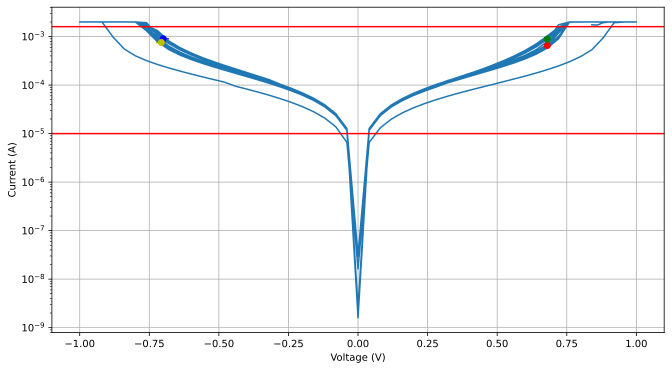

In [93]:
    plt.rcParams['figure.figsize'] = (11,6)
    plt.figure(0)
    plt.grid()
    plt.semilogy(V, I)
    plt.xlabel('Voltage (V)');
    plt.ylabel('Current (A)');
#     nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
#     ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
#     sampleText = '  Sample ' + sampleNumber
#     device = '  Device ' + deviceNumber

#     title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sampleText + device
    
    plt.axhline(y=maxCurrentThreshhold, color='r', linestyle='-')
    plt.axhline(y=zeroThreshhold, color='r', linestyle='-')

    voltage = average(posThreshValuesVoltage)
    current = average(posThreshValuesCurrent)
    plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="ro")

    voltage = average(negThreshValuesVoltage)
    current = average(negThreshValuesCurrent)
    plt.errorbar(voltage, current, xerr=np.std(negThreshValuesVoltage), fmt="bo")

    voltage = average(posHoldValuesVoltage)
    current = average(posHoldValuesCurrent)
    plt.errorbar(voltage, current, xerr=np.std(posHoldValuesVoltage), fmt="go")

    voltage = average(negHoldValuesVoltage)
    current = average(negHoldValuesCurrent)
    plt.errorbar(voltage, current, xerr=np.std(negHoldValuesVoltage), fmt="yo")
    
#     for y in range(len([*posThreshValuesVoltage, *negThreshValuesVoltage]) - 1):
#         voltage = [*posThreshValuesVoltage, *negThreshValuesVoltage]
#         current = [*posThreshValuesCurrent, *negThreshValuesCurrent]
#         plt.errorbar(voltage[y], current[y], xerr=0, fmt="ro")
        
#     for y in range(len([*posHoldValuesVoltage, *negHoldValuesVoltage]) - 1):
#         voltage = [*posHoldValuesVoltage, *negHoldValuesVoltage]
#         current = [*posHoldValuesCurrent, *negHoldValuesCurrent]
#         plt.errorbar(voltage[y], current[y], xerr=0, fmt="bo")

    # plt.title(title)

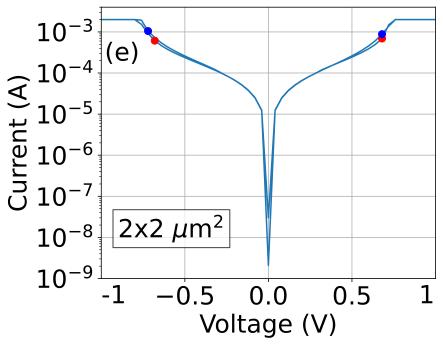

In [96]:
for x in range(32, 36, 4):
    fig, ax = plt.subplots(figsize =(6, 5))
    plt.xlabel('Voltage (V)', fontsize=25);
    plt.ylabel('Current (A)', fontsize=25);
    font = {'size': 25 }
    matplotlib.rc('font', **font)
    ax.text(-0.98, 0.2e-3, "(e)")
    # ax.text(-0.95, 0.2e-3, "(f)")
    
    
    
    
    
    plt.grid()
    ax.text(-0.9, 1e-8, "2x2 $\mu$m$^2$",
        bbox={'facecolor': 'white', 'alpha': 0.75, 'pad': 5})
    font = {'size': 19 }
    matplotlib.rc('font', **font)

    plt.semilogy(V[allIndexes[x]:allIndexes[x+8]], I[allIndexes[x]:allIndexes[x+8]])
#     plt.semilogy(V[allIndexes[x]:allIndexes[x+3]], secondDerivativeCurrent[allIndexes[x]:allIndexes[x+3]])
#     plt.semilogy(V[allIndexes[x]:allIndexes[x+3]], secondDerivativeCurrent[allIndexes[x]:allIndexes[x+3]])
    # plt.grid()
    # plt.semilogy(self.V, self.I)
    
    ax.set_ylim([1e-9, 4e-3])
    ax.set_xlim([-0.99999, 0.99999])

    
    for y in posThreshValuesCurrent:
        if y in I[allIndexes[x]:allIndexes[x+8]]:
            index = list(I).index(y)
            plt.errorbar(V[index], I[index], xerr=0, fmt="ro", markersize=7)
            
    for y in negThreshValuesCurrent:
        if y in I[allIndexes[x]:allIndexes[x+8]]:
            index = list(I).index(y)
            plt.errorbar(V[index], I[index], xerr=0, fmt="bo", markersize=7)
    
    for y in posHoldValuesCurrent:
        if y in I[allIndexes[x]:allIndexes[x+8]]:
            index = list(I).index(y)
            plt.errorbar(V[index], I[index], xerr=0, fmt="bo", markersize=7)
            
    for y in negHoldValuesCurrent:
        if y in I[allIndexes[x]:allIndexes[x+8]]:
            index = list(I).index(y)
            plt.errorbar(V[index], I[index], xerr=0, fmt="ro", markersize=7)
    
    # for a in range(allIndexes[x],allIndexes[x+3]):
    #     plt.errorbar(V[a], I[a], xerr=0, fmt="go", markersize=3)

    # plt.title(title)
    plt.yticks(fontsize=25)
    plt.xticks(fontsize=25)
    plt.text(-1, 2.5e-10, "-1", fontsize=25)
    plt.text(0.9, 2.5e-10, "1", fontsize=25)

    plt.savefig("final IC I-V Curve v2 2x2.pdf",bbox_inches='tight')
    plt.show()

In [95]:
    # voltage = average(posThreshValuesVoltage)
    # current = average(posThreshValuesCurrent)
    # plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="ro")

    # voltage = average(negThreshValuesVoltage)
    # current = average(negThreshValuesCurrent)
    # plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="bo")

    # voltage = average(posHoldValuesVoltage)
    # current = average(posHoldValuesCurrent)
    # plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="go")

    # voltage = average(negHoldValuesVoltage)
    # current = average(negHoldValuesCurrent)
    # plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="yo")